<a href="https://colab.research.google.com/github/Surojit-KB/UNIV-AI-ML2-LAB2/blob/main/Copy_of_lab2_distribute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Digit Recognition with LogReg/RF/GBT
### Univ.AI 
### ML-2 Cohort-1


In [ ]:
#Import libraries
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

## Load the data

In [ ]:
dataset = datasets.load_digits()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train = X_train/255.0
X_test = X_test/255.0

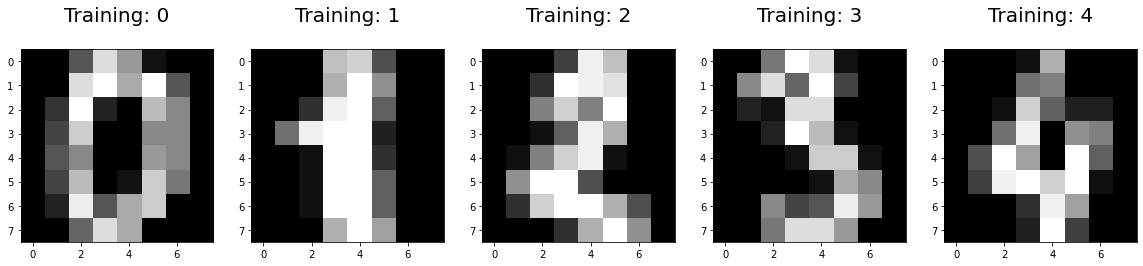

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(dataset.data[0:5], dataset.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

## Modelling

In [ ]:
#Define a function to plot confusion matrix 
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

### Logistic Regression

In [ ]:
c_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

#Hyper parameter tuning for Logistic regression
#your code here 
def cv_optimize(clf, parameters, X, y, n_folds):

    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds,scoring='accuracy',n_jobs=-1)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_)
    best_model = gs.best_estimator_
    best_params= gs.best_params_
    return best_model,best_params



#Finding the best value of C using GridSearchCV
#your code here 
best_estimate,base_param=cv_optimize(clf=LogisticRegression(max_iter=1000),parameters=c_values,X=X_train,y=y_train,n_folds=10)

BEST {'C': 1000} 0.9721736596736598


In [ ]:
#Prediction on the test data
y_pred=best_estimate.predict(X_test)

In [ ]:
#Print accuracy score of test data

#your code here 
print(f'The accuracy score on the Test data: {best_estimate.score(X_test,y_test) :.2f}')

The accuracy score on the Test data: 0.96


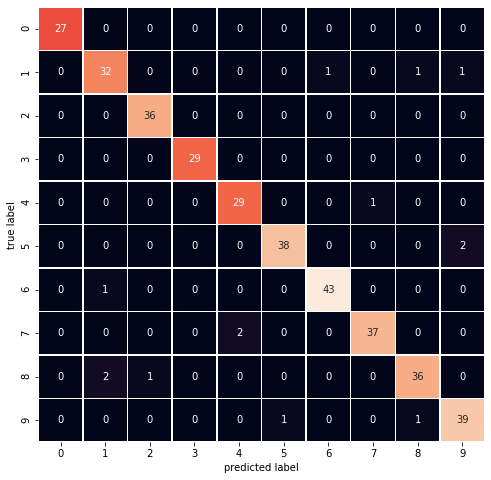

In [ ]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, y_pred)

### Random Forest

In [ ]:
#Create 2 models with same max_depth and different min_samples_leaf
ensemble_clfs = [(1,RandomForestClassifier(warm_start=True, min_samples_leaf=1,oob_score=True,max_depth = 10,random_state=420)),
                (5,RandomForestClassifier(warm_start=True, min_samples_leaf=5,oob_score=True,max_depth = 10,random_state=420))]

# Map a label (the value of `min_samples_leaf`) to a list of (model, oob error) tuples.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 80
max_estimators = 500

#Create models for all n_estimators

#your code here 
for label, model in ensemble_clfs:
  for i in range(min_estimators,max_estimators+1):
    model=model.set_params(n_estimators=i)
    model.fit(X_train,y_train)
    error_rate[label].append((i,1-model.oob_score_))

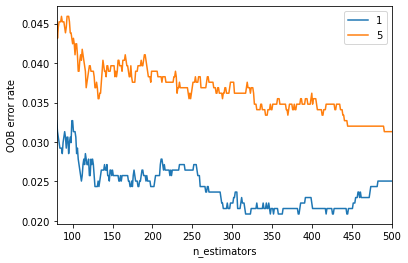

In [ ]:

#Plot the OOB score vs n_estimators for different min_samples_leaf

#your code here 
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
#Find the best model by finding the lowest oob score and print out the min_samples_leaf and n_estimators for that model

#your code here 
best_params=min(error_rate[1],key=lambda t:t[1])
best_num_estimators=best_params[0]
best_leaf=1
print(f'Optimum num of estimators: {best_num_estimators} \nmin_samples_leaf: {best_leaf}')

Optimum num of estimators: 317 
min_samples_leaf: 1


In [ ]:
#Build the best model taking the above best parameters

#your code here 

model=RandomForestClassifier(warm_start=True, n_estimators=best_num_estimators,min_samples_leaf=1,oob_score=True,max_depth = 10,random_state=420)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=317,
                       n_jobs=None, oob_score=True, random_state=420, verbose=0,
                       warm_start=True)

In [ ]:
#Print accuracy score of test data
#your code here 
y_pred=model.predict(X_test)
print(f'The test accuracy of the Random Forest model is {model.score(X_test,y_test):.2f}')

The test accuracy of the Random Forest model is 0.98


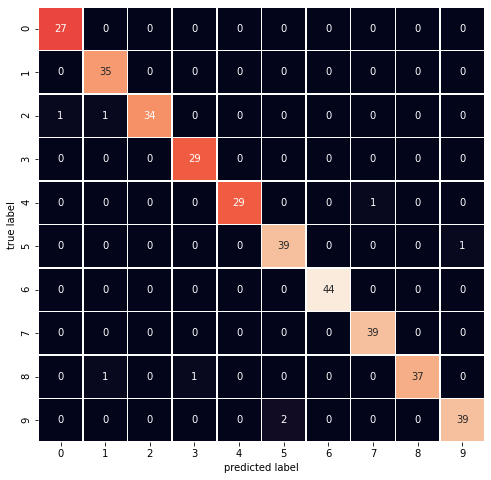

In [ ]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, y_pred)

### Gradient Boosting

In [ ]:
%%time
n_estimators = 500
# We specify that if the scores don't improve by atleast 0.01 for the last 5 stages, stop fitting additional stages
#your code here
model= GradientBoostingClassifier(n_estimators=n_estimators)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

CPU times: user 12.7 s, sys: 11.9 ms, total: 12.8 s
Wall time: 12.7 s


In [ ]:
#Predicting on the test data and calculating the accuracy score
#your code here
model_acc=model.score(X_test,y_test)
#Print accuracy score of test data
#your code here
print('The accuracy of the model on the Test data is',model_acc)

The accuracy of the model on the Test data is 0.9638888888888889


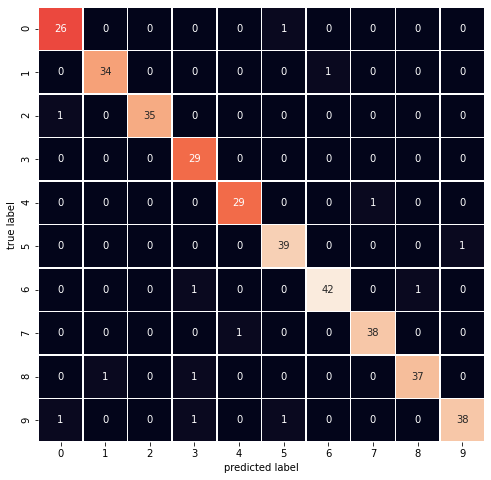

In [ ]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test,y_pred)

#### **Optional**

In [ ]:
#Create a model with early stopping
%%time
early_model=GradientBoostingClassifier(n_estimators=n_estimators,n_iter_no_change=5, tol=0.01,validation_fraction=0.1)
early_model.fit(X_train,y_train)
y_pred=early_model.predict(X_test)

CPU times: user 5.99 s, sys: 5.42 ms, total: 5.99 s
Wall time: 6.01 s


In [ ]:
early_model_acc=early_model.score(X_test,y_test)
print('The accuracy of the model on the Test data is',early_model_acc)

The accuracy of the model on the Test data is 0.9583333333333334


In [ ]:
model_est=model.n_estimators_
early_model_est=early_model.n_estimators_

In [ ]:
print(f'The num_estimators used for Boosting model without early stopping is {model_est} and the num estimators for model with early stopping is {early_model_est}')
print(f'The time required to run Boosting model without earky stopping is 12.7 secs and for model with early stopping, its 5.99 sec')

The num_estimators used for Boosting model without early stopping is 500 and the num estimators for model with early stopping is 96
The time required to run Boosting model without earky stopping is 12.7 secs and for model with early stopping, its 5.99 sec


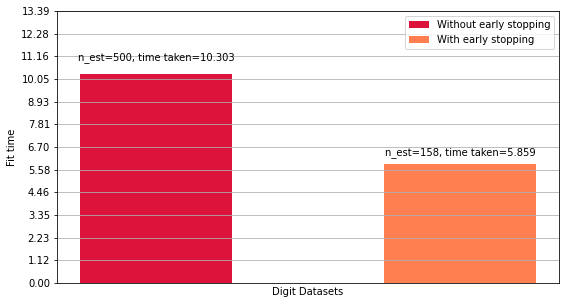

In [ ]:
#Plot the test score for the gradient boosting model with and without early stopping
#your code here


Which model did the best?
Early stopping model did the best since it achieved almost the same result in less amount of time while also being less computationally intensive. The best test set accuracy is achieved by the Random Forest model, with a test set accuracy of 98%.

THE  END.<br>
Thanks for the read.